In [102]:
from geopandas import GeoDataFrame
geoframe = GeoDataFrame.from_file("./TURTLES_FILTERED.shp")

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
geometry = geoframe.geometry

In [104]:
my_geometry = geoframe.geometry.unary_union
my_geometry.bounds
no_data_value=0
pixel_size=0.5
#x_res=10
#y_res=10
x_min, y_min, x_max, y_max = my_geometry.bounds

In [105]:
my_geometry.bounds

(-65.141845703125, -30.6082763671875, -57.53692626953125, -21.495849609375)

In [106]:
x_res = int((x_max - x_min) / pixel_size)
y_res = int((y_max - y_min) / pixel_size)

In [107]:
from rasterio.transform import Affine
def transform_from_corner(ulx, uly, dx, dy):
    return Affine.translation(ulx, uly)*Affine.scale(dx, -dy)

print transform_from_corner(bounds[0], bounds[3], 1.0/3600, 1.0/3600).to_gdal()

(-65.141845703125, 0.0002777777777777778, 0.0, -21.495849609375, 0.0, -0.0002777777777777778)


In [110]:
from rasterio.features import rasterize
from shapely.geometry import Polygon, mapping

# image transform
bounds = my_geometry.bounds

# transform = transform_from_corner(x_min, y_max, pixel_size, pixel_size)
transform = Affine.translation(x_min, y_max)*Affine.scale(pixel_size, -pixel_size)
# Make raster image, burn in vector data which lies completely inside the bounding box
output = rasterize([(my_geometry,255)], transform=transform, out_shape=(y_res, x_res), fill=11, default_value=1)
print output

[[ 11  11  11  11 255 255  11  11  11 255 255  11  11  11  11]
 [ 11  11  11  11 255 255 255 255 255 255 255  11  11  11  11]
 [ 11  11  11  11  11 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11 255 255 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11  11  11 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11  11  11 255 255 255 255 255 255 255  11  11  11]
 [ 11  11 255 255 255 255 255 255 255 255 255 255 255  11  11]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255  11]
 [ 11 255 255 255 255 255 255 255 255 255 255 255 255 255  11]
 [ 11  11 255 255 255 255 255 255 255 255 255 255 255 255  11]
 [ 11  11  11 255 255 255 255 255 255 255 255 255 255 255 255]
 [ 11  11  11 255 255 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11 255 255 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11  11 255 255 255 255 255 255 255 255  11  11  11]
 [ 11  11  11  11 255 255 255 255 255 255 255  11  11  11  11]
 [ 11  11  11  11  11 255 255 255 255 255 255  11  11  

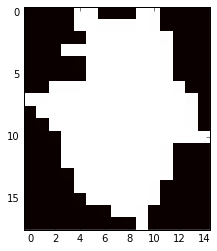

In [95]:
plt.imshow(output, cmap="hot", interpolation="none")

In [111]:
import rasterio
import numpy as np
with rasterio.open(
            "test.tif",
            'w',
            driver='GTiff',
            width=x_res,
            height=y_res,
            count=1,
            dtype=np.uint8,
            nodata=no_data_value,
            transform=transform,
            crs={'init': "EPSG:4326"}) as out:
        out.write(output.astype(np.uint8), indexes=1)

out.close()